In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [13]:
df = pd.read_csv("AirQualityUCI.csv", delimiter=';', decimal=',', na_values=-200)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [19]:
df['Time'] = df['Time'].str.replace('.', ':')
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [21]:
df = df.set_index('DateTime')

In [23]:
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64

In [25]:
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


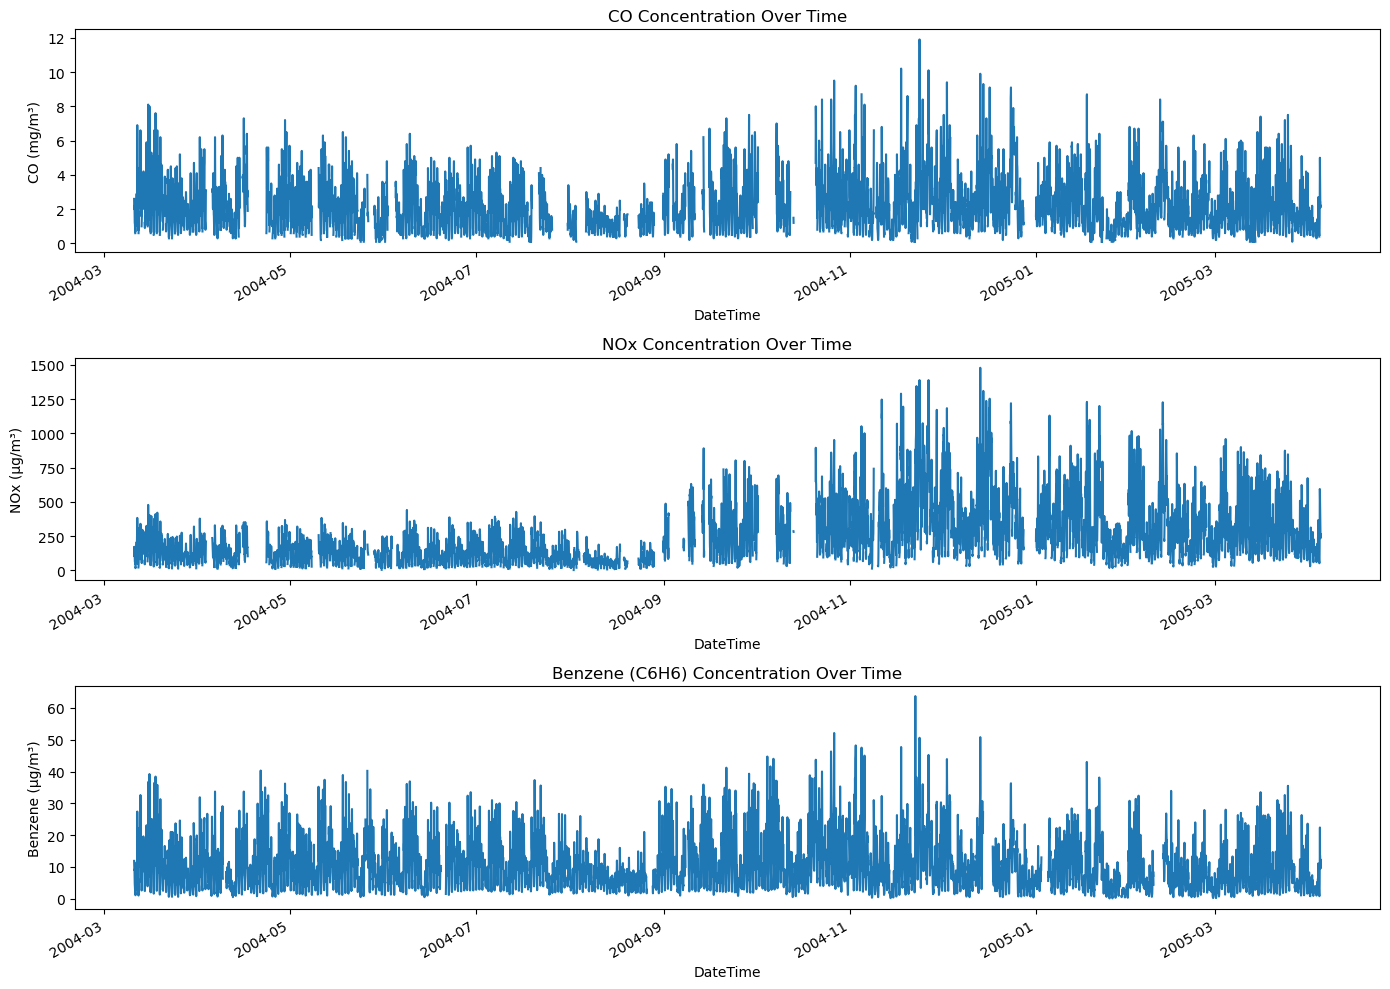

In [27]:
# 1. Time-series plots of CO, NOx, and Benzene concentrations
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
df['CO(GT)'].plot(title='CO Concentration Over Time')
plt.ylabel('CO (mg/m³)')

plt.subplot(3, 1, 2)
df['NOx(GT)'].plot(title='NOx Concentration Over Time')
plt.ylabel('NOx (µg/m³)')

plt.subplot(3, 1, 3)
df['C6H6(GT)'].plot(title='Benzene (C6H6) Concentration Over Time')
plt.ylabel('Benzene (µg/m³)')

plt.tight_layout()
plt.savefig('time_series_plots.png')
plt.show()

In [29]:
# 2. Daily/weekly patterns
# Resample to get hourly and daily averages
hourly_co = df['CO(GT)'].groupby(df.index.hour).mean()
daily_co = df['CO(GT)'].groupby(df.index.dayofweek).mean()

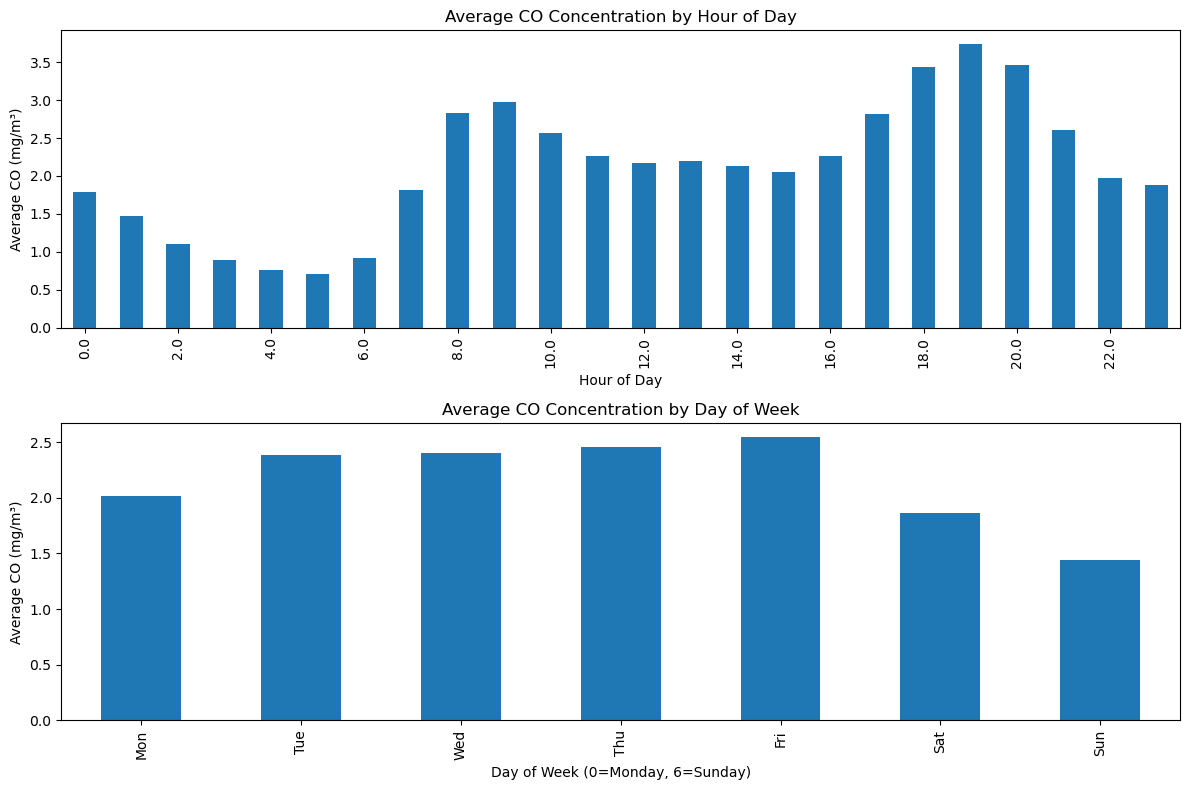

In [31]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
hourly_co.plot(kind='bar', title='Average CO Concentration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average CO (mg/m³)')
plt.xticks(range(0, 24, 2))

plt.subplot(2, 1, 2)
daily_co.plot(kind='bar', title='Average CO Concentration by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average CO (mg/m³)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.savefig('daily_weekly_patterns.png')
plt.show()

In [33]:
# 3. Correlation heatmap between different pollutants
# Select relevant pollutant columns
pollutants = ['CO(GT)', 'NOx(GT)', 'C6H6(GT)', 'NO2(GT)']

In [35]:
# Calculate correlation matrix
corr_matrix = df[pollutants].corr()

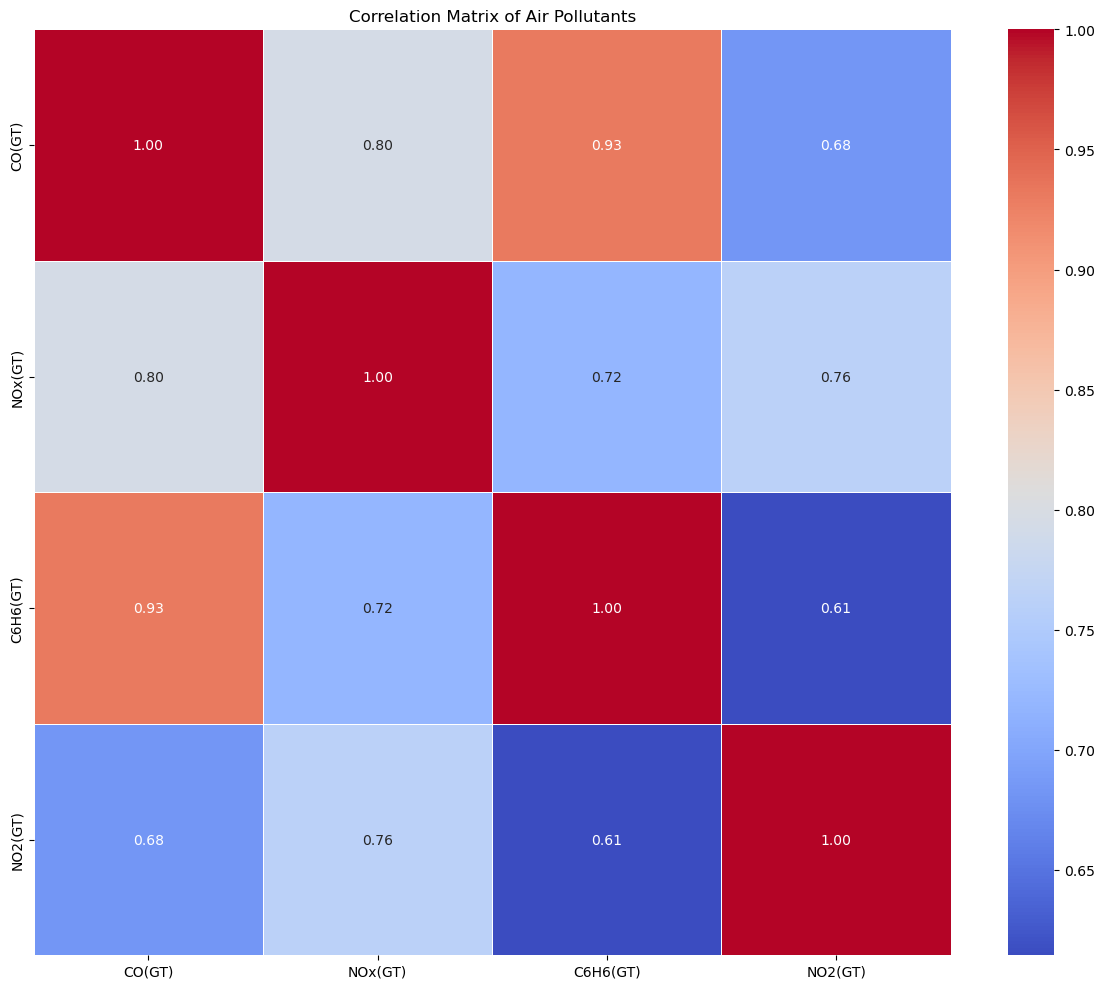

In [37]:
# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Air Pollutants')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

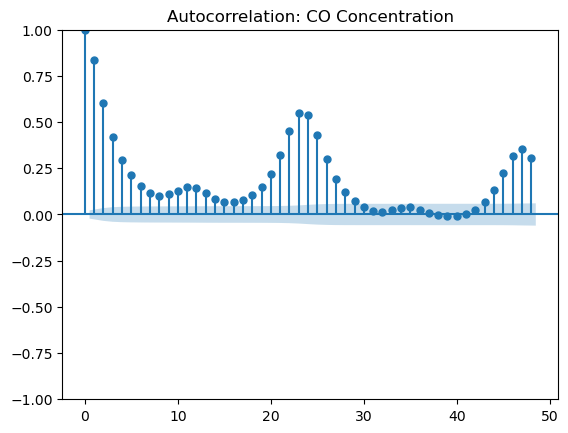

In [57]:
#4 Bonus: Autocorrelation
plot_acf(df['CO(GT)'].dropna(), lags=48, title='Autocorrelation: CO Concentration')
plt.show()

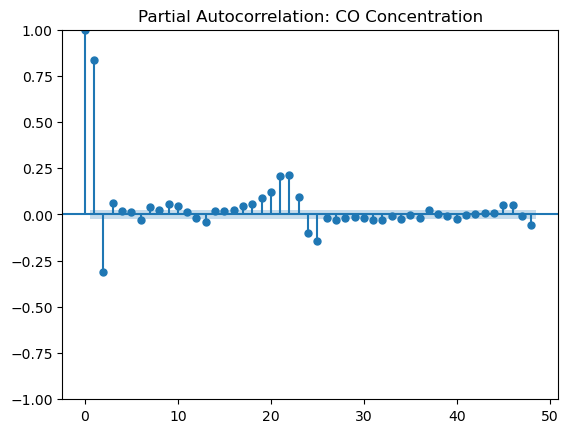

In [55]:
plot_pacf(df['CO(GT)'].dropna(), lags=48, title='Partial Autocorrelation: CO Concentration')

plt.show()